#Stroke Prediction Dataset

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id, age, avg_glucose_level, bmi - numerical variables

gender, hypertension, heart_disease, ever_married, work_type, Residence_type, smoking_status, stroke - categorical variables

In [ ]:
df.info

<bound method DataFrame.info of          id  gender   age  ...   bmi   smoking_status stroke
0      9046    Male  67.0  ...  36.6  formerly smoked      1
1     51676  Female  61.0  ...   NaN     never smoked      1
2     31112    Male  80.0  ...  32.5     never smoked      1
3     60182  Female  49.0  ...  34.4           smokes      1
4      1665  Female  79.0  ...  24.0     never smoked      1
...     ...     ...   ...  ...   ...              ...    ...
5105  18234  Female  80.0  ...   NaN     never smoked      0
5106  44873  Female  81.0  ...  40.0     never smoked      0
5107  19723  Female  35.0  ...  30.6     never smoked      0
5108  37544    Male  51.0  ...  25.6  formerly smoked      0
5109  44679  Female  44.0  ...  26.2          Unknown      0

[5110 rows x 12 columns]>

In [ ]:
pd.DataFrame({"Dtype": df.dtypes, "Unique": df.nunique(), "Missing%": (df.isnull().sum()/df.shape[0])*100})

,Dtype,Unique,Missing%
id,int64,5110,0.000000
gender,object,3,0.000000
age,float64,104,0.000000
hypertension,int64,2,0.000000
heart_disease,int64,2,0.000000
ever_married,object,2,0.000000
work_type,object,5,0.000000
Residence_type,object,2,0.000000
avg_glucose_level,float64,3979,0.000000
bmi,float64,418,3.933464


Encoding the categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['ever_married'] = encoder.fit_transform(df['ever_married'])
df['ever_married'].value_counts()

1    3353
0    1757
Name: ever_married, dtype: int64

In [ ]:
df['work_type'] = encoder.fit_transform(df['work_type'])
df['work_type'].value_counts()

2    2925
3     819
4     687
0     657
1      22
Name: work_type, dtype: int64

In [ ]:
df['smoking_status'] = encoder.fit_transform(df['smoking_status'])
df['smoking_status'].value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [ ]:
df['gender'] = encoder.fit_transform(df['gender'])
df['gender'].value_counts()

0    2994
1    2115
2       1
Name: gender, dtype: int64

In [ ]:
df['Residence_type'] = encoder.fit_transform(df['Residence_type'])
df['Residence_type'].value_counts()

1    2596
0    2514
Name: Residence_type, dtype: int64

In [ ]:
df.describe()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,0.410063,42.865374,0.091872,0.049501,0.652679,2.170096,0.507232,105.305150,28.893237,1.375433,0.042575
std,20995.098457,0.492309,22.555115,0.288875,0.216934,0.476167,1.092593,0.499999,44.424341,7.854067,1.067322,0.201917
min,77.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,18605.000000,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.070000,23.500000,0.000000,0.000000
50%,37608.000000,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.680000,28.100000,2.000000,0.000000
75%,55220.000000,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,1.000000,113.570000,33.100000,2.000000,0.000000
max,72940.000000,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


Missing Values
--

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Dealing with missing values. The dataset has only 201 missing values from the column bmi - we can either drop the rows with missing data or perform techniques to handle the missing data, such as forward fill. Because of the large number of data in the dataset i chose to drop the rows with missing values

In [ ]:
df = df.dropna()

In [ ]:
df.reset_index()

,index,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,9046,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,2,31112,1,80.0,0,1,1,2,0,105.92,32.5,2,1
2,3,60182,0,49.0,0,0,1,2,1,171.23,34.4,3,1
3,4,1665,0,79.0,1,0,1,3,0,174.12,24.0,2,1
4,5,56669,1,81.0,0,0,1,2,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,5104,14180,0,13.0,0,0,0,4,0,103.08,18.6,0,0
4905,5106,44873,0,81.0,0,0,1,3,1,125.20,40.0,2,0
4906,5107,19723,0,35.0,0,0,1,3,0,82.99,30.6,2,0
4907,5108,37544,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [ ]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.shape

(4909, 12)

Visualization
--

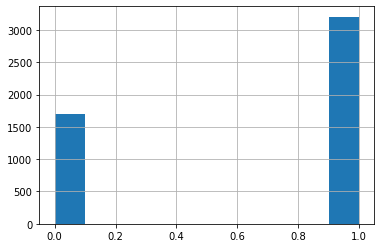

In [ ]:
df['ever_married'].hist()

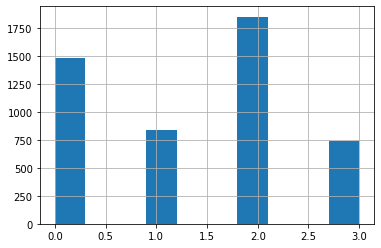

In [ ]:
df['smoking_status'].hist()

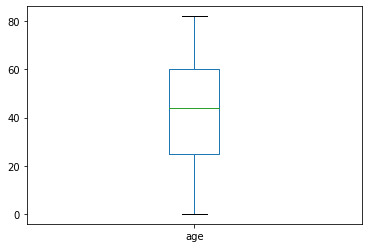

In [ ]:
df.age.plot.box()

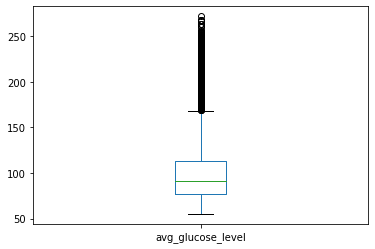

In [ ]:
df.avg_glucose_level.plot.box()

We can see that the avg_glucose_level column has a lot of outliers

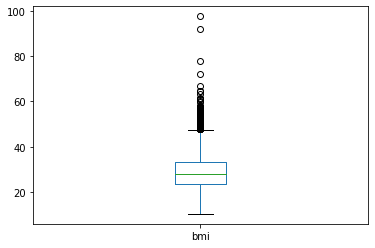

In [ ]:
df.bmi.plot.box()

The bmi columns also has outliers

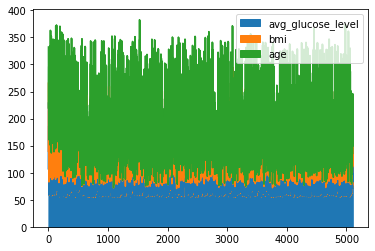

In [ ]:
df[['avg_glucose_level', 'bmi', 'age']].plot.area()

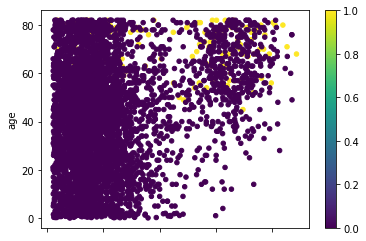

In [ ]:
df.plot.scatter(x='avg_glucose_level', y='age', c=df['stroke'], colormap='viridis')

In the above graph is shown how the age and average glucose level in the blood indicates the possibility of stroke.

Text(0.5, 1.0, 'Age VS Avg glucose level Scatterplot')

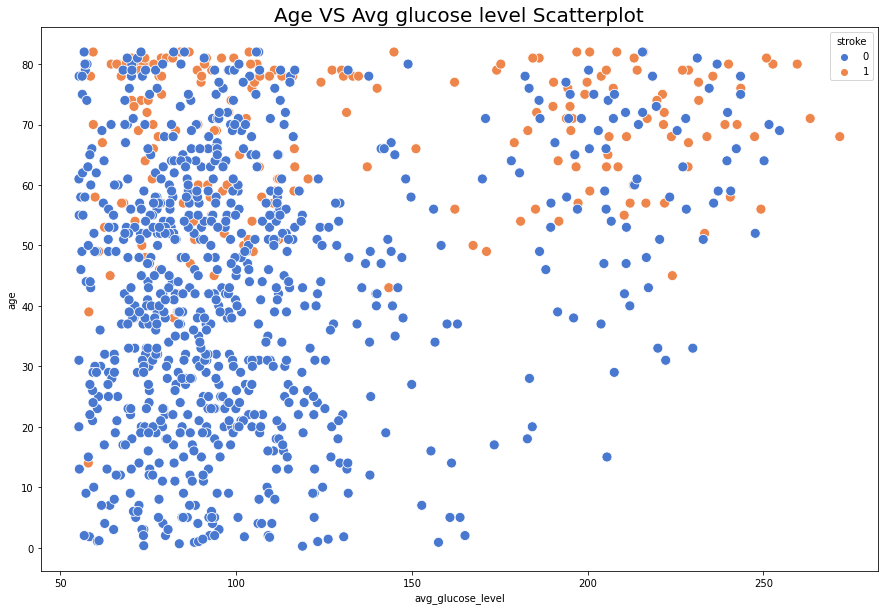

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
d=sns.scatterplot(y="age", x="avg_glucose_level",palette="muted",data=df.head(1000),s=100 , color='r',hue=df.stroke)
d.set_title('Age VS Avg glucose level Scatterplot',fontsize=20)

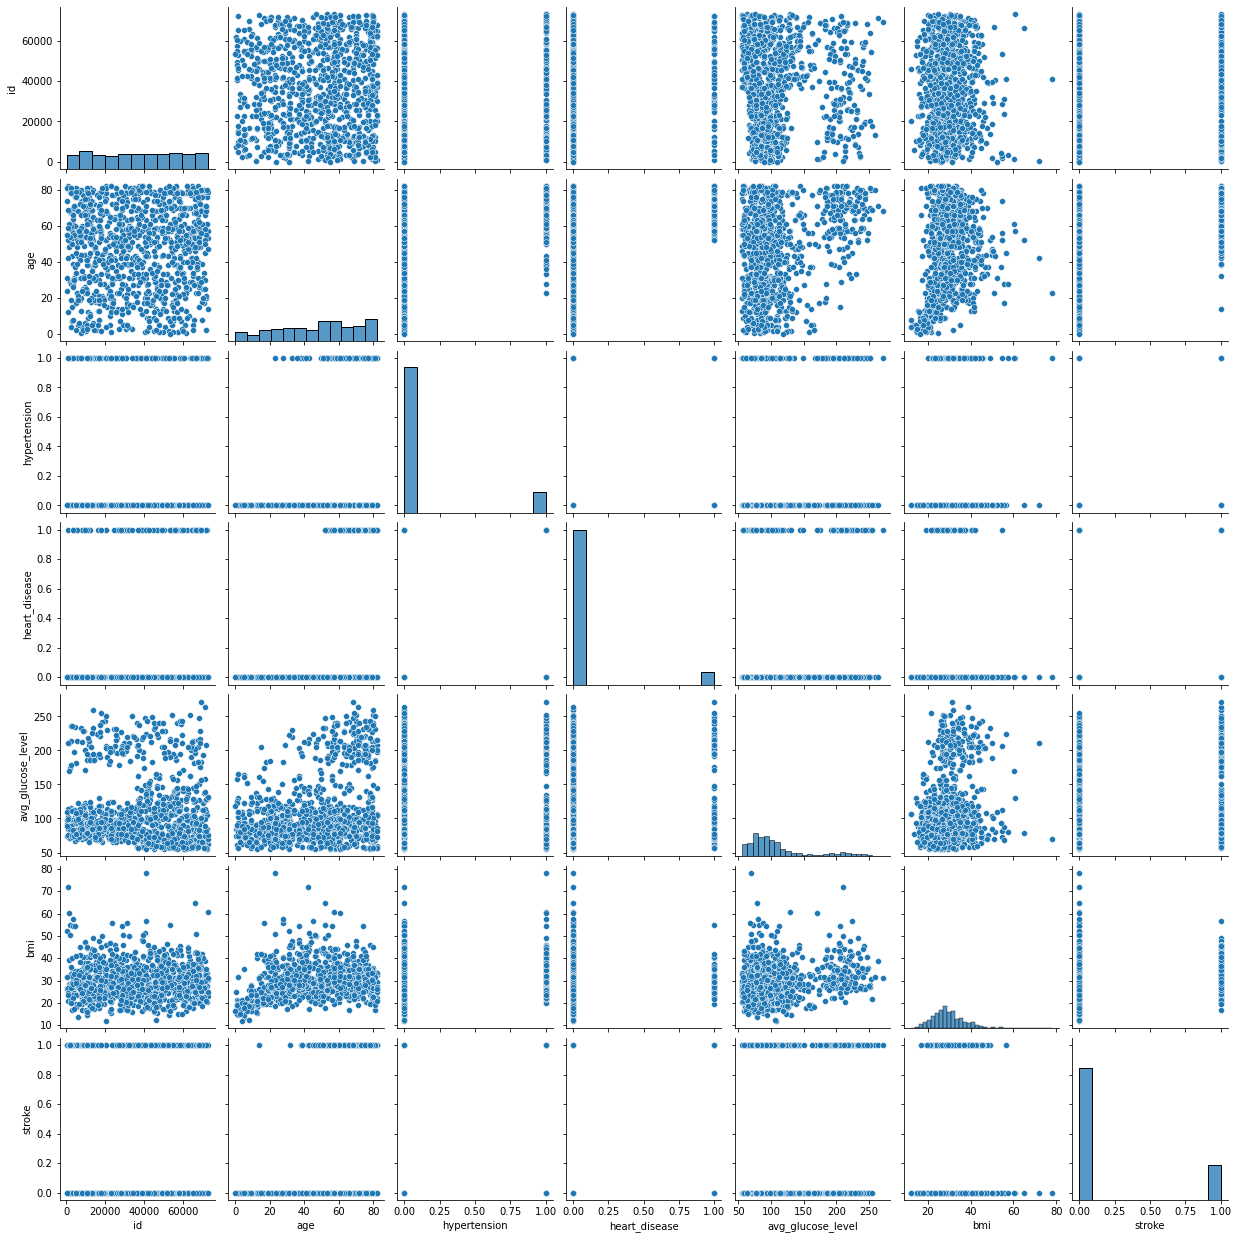

In [ ]:
sns.pairplot(df.head(1000))

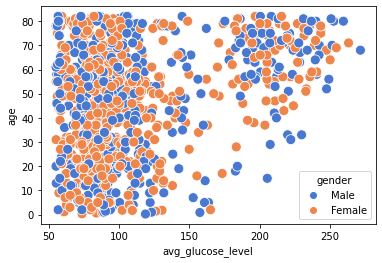

In [ ]:
sns.scatterplot(y="age", x="avg_glucose_level",palette="muted",data=df.head(1000),s=100 , color='r',hue=df.gender)

How the age and average glucose level in the blood relates to the gender of the patient

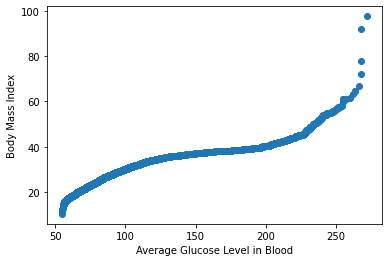

In [ ]:
plt.figure()
plt.scatter(np.sort(df.avg_glucose_level), np.sort(df.bmi))
plt.xlabel('Average Glucose Level in Blood')
plt.ylabel('Body Mass Index')
plt.show()

Body Mass Index (BMI) is a person's weight in kilograms divided by the square of height in meters. A high BMI can be an indicator of high body fatness.

From this graph we can conclude that there is a positive correlation between average glucose level and bmi

In [ ]:
import scipy
import matplotlib

((array([-3.63095119, -3.39534381, -3.26547426, ...,  3.26547426,
          3.39534381,  3.63095119]),
  array([ 55.12,  55.22,  55.23, ..., 267.61, 267.76, 271.74])),
 (39.90682648897461, 105.3051497249949, 0.8977921184294017))

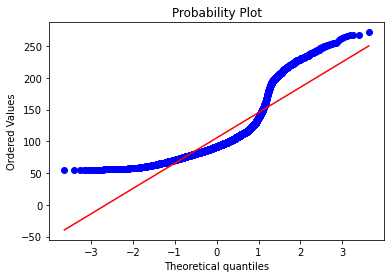

In [ ]:
scipy.stats.probplot(df['avg_glucose_level'], dist='norm', plot=matplotlib.pyplot)

((array([-3.63095119, -3.39534381, -3.26547426, ...,  3.26547426,
          3.39534381,  3.63095119]),
  array([8.0e-02, 8.0e-02, 1.6e-01, ..., 8.2e+01, 8.2e+01, 8.2e+01])),
 (22.212109688487878, 42.865373803218574, 0.9842249071157575))

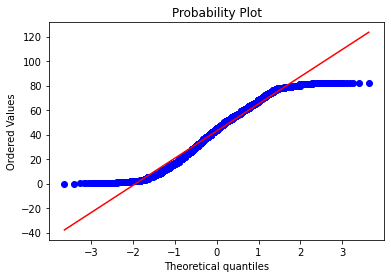

In [ ]:
scipy.stats.probplot(df['age'], dist='norm', plot=matplotlib.pyplot)

((array([-3.63095119, -3.39534381, -3.26547426, ...,  3.26547426,
          3.39534381,  3.63095119]),
  array([10.3, 11.3, 11.5, ..., 78. , 92. , 97.6])),
 (7.672055794833971, 28.893236911794663, 0.9762628252646554))

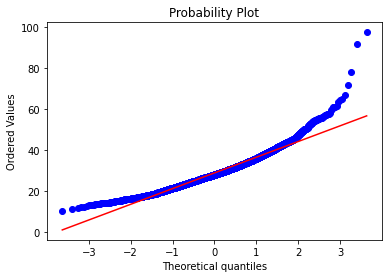

In [ ]:
scipy.stats.probplot(df['bmi'], dist='norm', plot=matplotlib.pyplot)

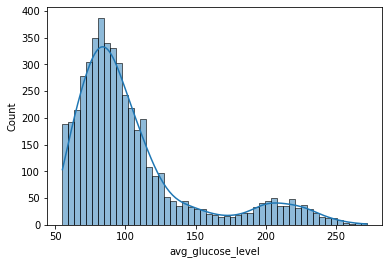

In [ ]:
sns.histplot(x=df.avg_glucose_level, kde=True)

From this histplot we can see that the patients have normal average glucose levels in their blood

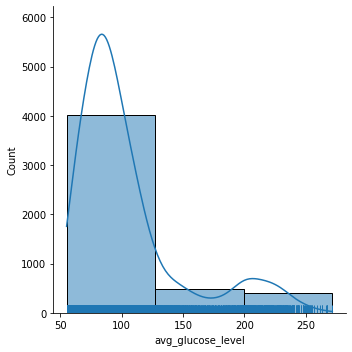

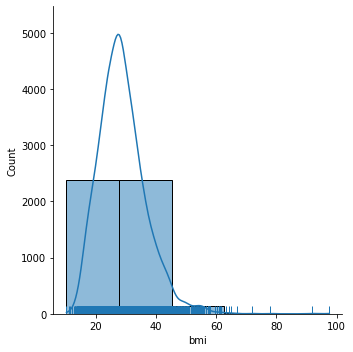

In [ ]:
sns.displot(df['avg_glucose_level'], bins=3, kde=True, rug=True,label='Average Glucose Level')
sns.displot(df['bmi'], bins=5, kde=True, rug=True,label = 'Body Mass Index')

([<matplotlib.axis.XTick at 0x7fe09252b4d0>,
 [Text(0, 0, 'Female'), Text(0, 0, 'Male'), Text(0, 0, 'Other')])

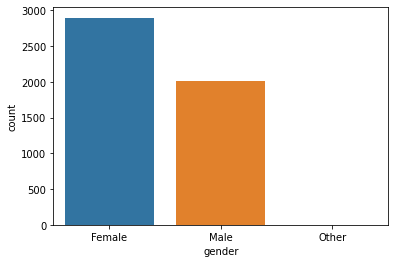

In [ ]:
sns.countplot(x=df.gender)
plt.xticks([0, 1, 2], ["Female", "Male", "Other"])

From this plot we can see that about more than half the patients are female

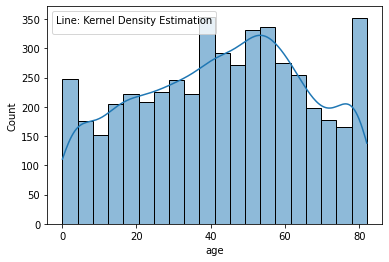

In [ ]:
sns.histplot(df.age, kde=True)
plt.legend(labels=[], title="Line: Kernel Density Estimation")

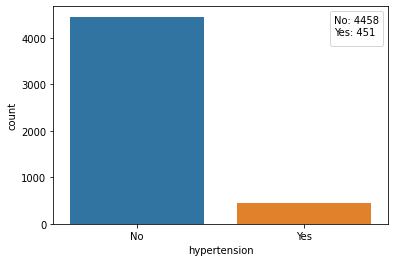

In [ ]:
sns.countplot(x=df.hypertension)
plt.xticks([0, 1], ["No", "Yes"])
info_text="No: "+str(df.hypertension.value_counts()[0])+"\nYes: "+str(df.hypertension.value_counts()[1])
plt.legend(labels=[], title=info_text)

The majority of patients don't have hypertension

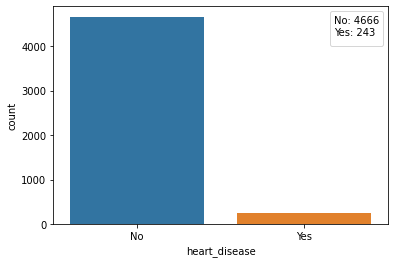

In [ ]:
sns.countplot(x=df.heart_disease)
plt.xticks([0, 1], ["No", "Yes"])
info_text="No: "+str(df.heart_disease.value_counts()[0])+"\nYes: "+str(df.heart_disease.value_counts()[1])
plt.legend(labels=[], title=info_text)

From this plot we can see that the majority of the patients don't have any kind of heart diseases

([<matplotlib.axis.XTick at 0x7fe09685b950>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

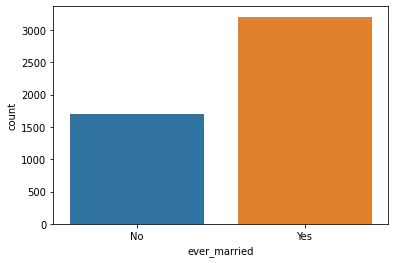

In [ ]:
sns.countplot(x=df.ever_married)
plt.xticks([0, 1], ["No", "Yes"])

From this plot we can see that the majority of patients are married

([<matplotlib.patches.Wedge at 0x7fe092793890>,
 [Text(-0.25557630075175136, 1.100718290251439, 'Private'),
  Text(-0.6552144628077758, -0.9206486885492847, 'Self Employed'),
  Text(0.34133928935710195, -1.0772128339103602, 'Children'),
  Text(1.026500491562975, -0.472437023126862, 'Government Jobs'),
  Text(1.1298880026209894, -0.015909165067692174, 'Never Worked')],
 [Text(-0.14248944201203834, 0.6136747989897401, '57.3%'),
  Text(-0.3652965589105298, -0.5132820122000437, '15.8%'),
  Text(0.19030420557077363, -0.6005699870473689, '13.7%'),
  Text(0.5722967342342248, -0.2633940925397549, '12.8%'),
  Text(0.6299375589833834, -0.008869711497916873, '0.4%')])

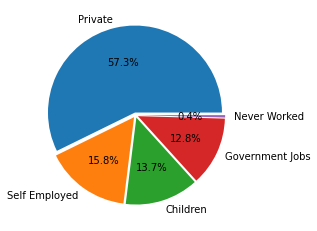

In [ ]:
renamed_labels=['Private', 'Self Employed', 'Children', 'Government Jobs', 'Never Worked']
plt.pie(x=df.work_type.value_counts(), labels=renamed_labels, autopct="%1.1f%%", 
        explode=df.work_type.nunique()*[.03])

From this pie plot we can conclude that about half of the patients work private jobs

([<matplotlib.patches.Wedge at 0x7fe0953d65d0>,
 [Text(-0.025669945090536973, 1.1297083933117646, 'Urban'),
  Text(0.02566983931960324, -1.1297083957151537, 'Rural')],
 [Text(-0.014311562307113534, 0.6298374228198335, '50.7%'),
  Text(0.014311503337477912, -0.6298374241597757, '49.3%')])

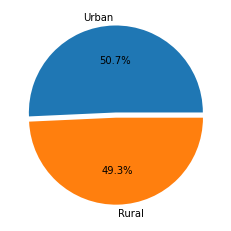

In [ ]:
plt.pie(x=df.Residence_type.value_counts(), labels=["Urban", "Rural"], autopct="%1.1f%%", 
        explode=df.Residence_type.nunique()*[.03])


From the pie plot above we can see that about half of the patients live in an Urban area, and the other half in Rural area

([<matplotlib.patches.Wedge at 0x7fe096e39dd0>,
 [Text(-1.0901752434118879, 0.14668994052705597, 'No'),
  Text(1.0901752348280713, -0.1466900043205386, 'Yes')],
 [Text(-0.5946410418610297, 0.08001269483293962, '95.7%'),
  Text(0.594641037178948, -0.08001272962938469, '4.3%')])

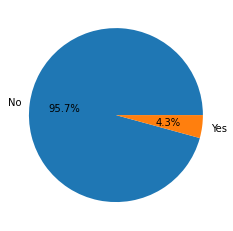

In [ ]:
plt.pie(x=df.stroke.value_counts(), labels=["No", "Yes"], autopct="%1.1f%%")


From the pie plot we can see that the majority of the patients haven't had a stroke.

Correlation
--

In [ ]:
df.corr()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,1.000000,0.007065,0.008984,0.001147,0.004016,0.016841,-0.022644,0.004978,0.006409,0.003084,0.018482,0.004839
gender,0.007065,1.000000,-0.030738,0.021578,0.082712,-0.037237,0.058560,-0.005014,0.053664,-0.026678,-0.060004,0.006757
age,0.008984,-0.030738,1.000000,0.274425,0.257123,0.680782,-0.366987,0.010948,0.235838,0.333398,0.275515,0.232331
hypertension,0.001147,0.021578,0.274425,1.000000,0.115991,0.162406,-0.052750,-0.001074,0.180543,0.167811,0.110808,0.142515
heart_disease,0.004016,0.082712,0.257123,0.115991,1.000000,0.111245,-0.030373,-0.002362,0.154525,0.041357,0.055236,0.137938
ever_married,0.016841,-0.037237,0.680782,0.162406,0.111245,1.000000,-0.357946,0.004989,0.151377,0.341695,0.264642,0.105089
work_type,-0.022644,0.058560,-0.366987,-0.052750,-0.030373,-0.357946,1.000000,-0.005422,-0.050581,-0.304876,-0.310911,-0.033756
Residence_type,0.004978,-0.005014,0.010948,-0.001074,-0.002362,0.004989,-0.005422,1.000000,-0.007617,-0.000122,0.013810,0.006031
avg_glucose_level,0.006409,0.053664,0.235838,0.180543,0.154525,0.151377,-0.050581,-0.007617,1.000000,0.175502,0.066335,0.138936
bmi,0.003084,-0.026678,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.224473,0.042374


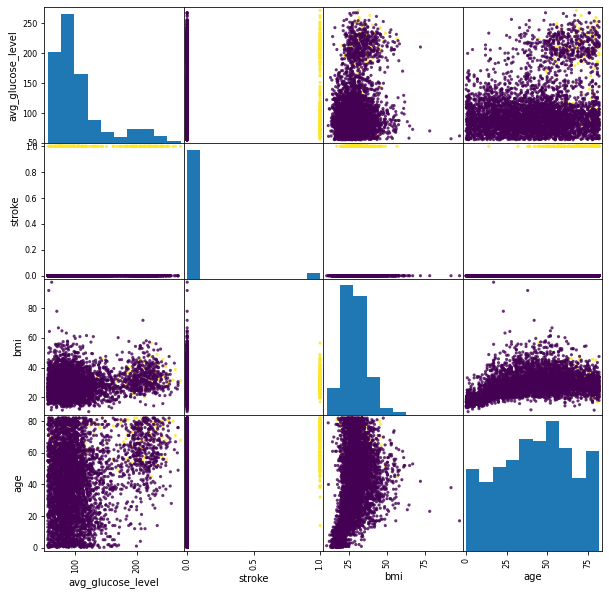

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[['avg_glucose_level', 'stroke', 'bmi', 'age']], c=df['stroke'], marker='o', s=10, alpha=0.8, figsize=[10,10])
plt.show()

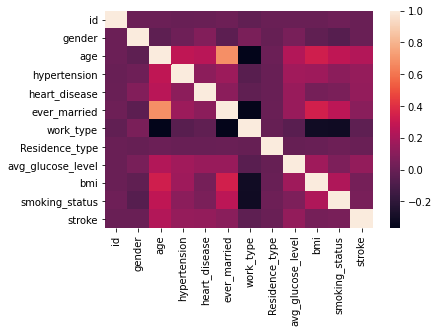

In [ ]:
sns.heatmap(df.corr())

Dimensionality Reduction - PCA
--

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)

df_new = pca.fit_transform(df)

In [ ]:
pca.components_

array([[-1.00000000e+00, -1.65673956e-07, -9.65148062e-06,
        -1.57832904e-08, -4.14935941e-08, -3.81944311e-07,
         1.17841985e-06, -1.18560258e-07, -1.35617532e-05,
        -1.15369853e-06, -9.39577095e-07, -4.65377579e-08],
       [-1.49422118e-05,  5.46545008e-04,  1.56436479e-01,
         1.28176681e-03,  8.29083276e-04,  2.16018661e-03,
        -1.95080665e-03, -7.37483006e-05,  9.87034196e-01,
         3.57095049e-02,  2.08955616e-03,  6.94355089e-04]])

No handles with labels found to put in legend.


Text(0.5, 1.0, 'PCA dimensionality reduction')

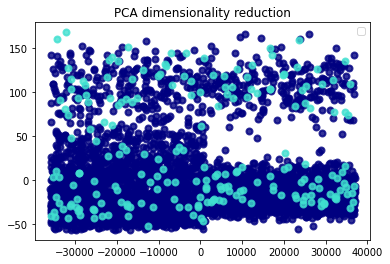

In [ ]:
colors = ['navy', 'turquoise']
lw = 2

for color, i in zip(colors, [0, 1]):
  plt.scatter(df_new[df.stroke == i, 0], df_new[df.stroke == i, 1], color=color, alpha=0.8, lw=lw)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA dimensionality reduction')


Outliers
--

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

id                   36615.0
gender                   1.0
age                     35.0
hypertension             0.0
heart_disease            0.0
ever_married             1.0
work_type                1.0
Residence_type           1.0
avg_glucose_level       36.5
bmi                      9.6
smoking_status           2.0
stroke                   0.0
dtype: float64

In [ ]:
print((df < (Q1 - 1.5 * IQR)) | (df > Q3 + 1.5 * IQR))

         id  gender    age  ...    bmi  smoking_status  stroke
0     False   False  False  ...  False           False    True
2     False   False  False  ...  False           False    True
3     False   False  False  ...  False           False    True
4     False   False  False  ...  False           False    True
5     False   False  False  ...  False           False    True
...     ...     ...    ...  ...    ...             ...     ...
5104  False   False  False  ...  False           False   False
5106  False   False  False  ...  False           False   False
5107  False   False  False  ...  False           False   False
5108  False   False  False  ...  False           False   False
5109  False   False  False  ...  False           False   False

[4909 rows x 12 columns]
